In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

c:\Users\RohSeungchan\anaconda3\envs\torch-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\RohSeungchan\anaconda3\envs\torch-gpu\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\RohSeungchan\anaconda3\envs\torch-gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\RohSeungchan\anaconda3\envs\torch-gpu\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
## 데이터 불러오기
target_column = 'income'
real_train_df = pd.read_csv('CHECK_DATASETS/train_hearts_data.csv')
real_test_df = pd.read_csv('CHECK_DATASETS/test_hearts_data.csv')
fake_train_df = pd.read_csv('FAKE_DATASETS/CTABGAN_fake_Hearts_0.csv')
print(real_train_df.shape)
print(real_test_df.shape)
print(fake_train_df.shape)
real_train_df.head()

(255836, 18)
(63959, 18)
(255836, 18)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,29.21,No,No,No,0.0,0.0,No,Male,55-59,White,No,Yes,Excellent,8.0,No,No,No,No
1,25.84,No,No,No,4.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,6.0,No,No,Yes,No
2,25.06,Yes,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Very good,6.0,No,No,No,No
3,25.63,No,No,No,0.0,0.0,No,Female,65-69,White,No,No,Very good,8.0,No,No,No,No
4,32.98,No,No,No,5.0,0.0,Yes,Male,70-74,White,No,Yes,Fair,10.0,No,No,Yes,No


In [4]:
discrete_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
col_order = discrete_columns
real_train_df = real_train_df.reindex(columns=col_order + list(real_train_df.columns.difference(col_order)))
real_test_df = real_test_df.reindex(columns=col_order + list(real_test_df.columns.difference(col_order)))
fake_train_df = fake_train_df.reindex(columns=col_order + list(fake_train_df.columns.difference(col_order)))

In [5]:
real_train_df.groupby(['HeartDisease'])['PhysicalHealth'].mean()

HeartDisease
No     2.970967
Yes    7.798977
Name: PhysicalHealth, dtype: float64

In [6]:
fake_train_df.groupby(['HeartDisease'])['PhysicalHealth'].mean()

HeartDisease
No     4.656135
Yes    7.321984
Name: PhysicalHealth, dtype: float64

In [7]:
continuous_list = []
categorical_list = []
for col in real_train_df.columns:
    if real_train_df[col].dtypes != 'O':
        continuous_list.append(col)
    else:
        categorical_list.append(col)

continuous_list

['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime']

[]

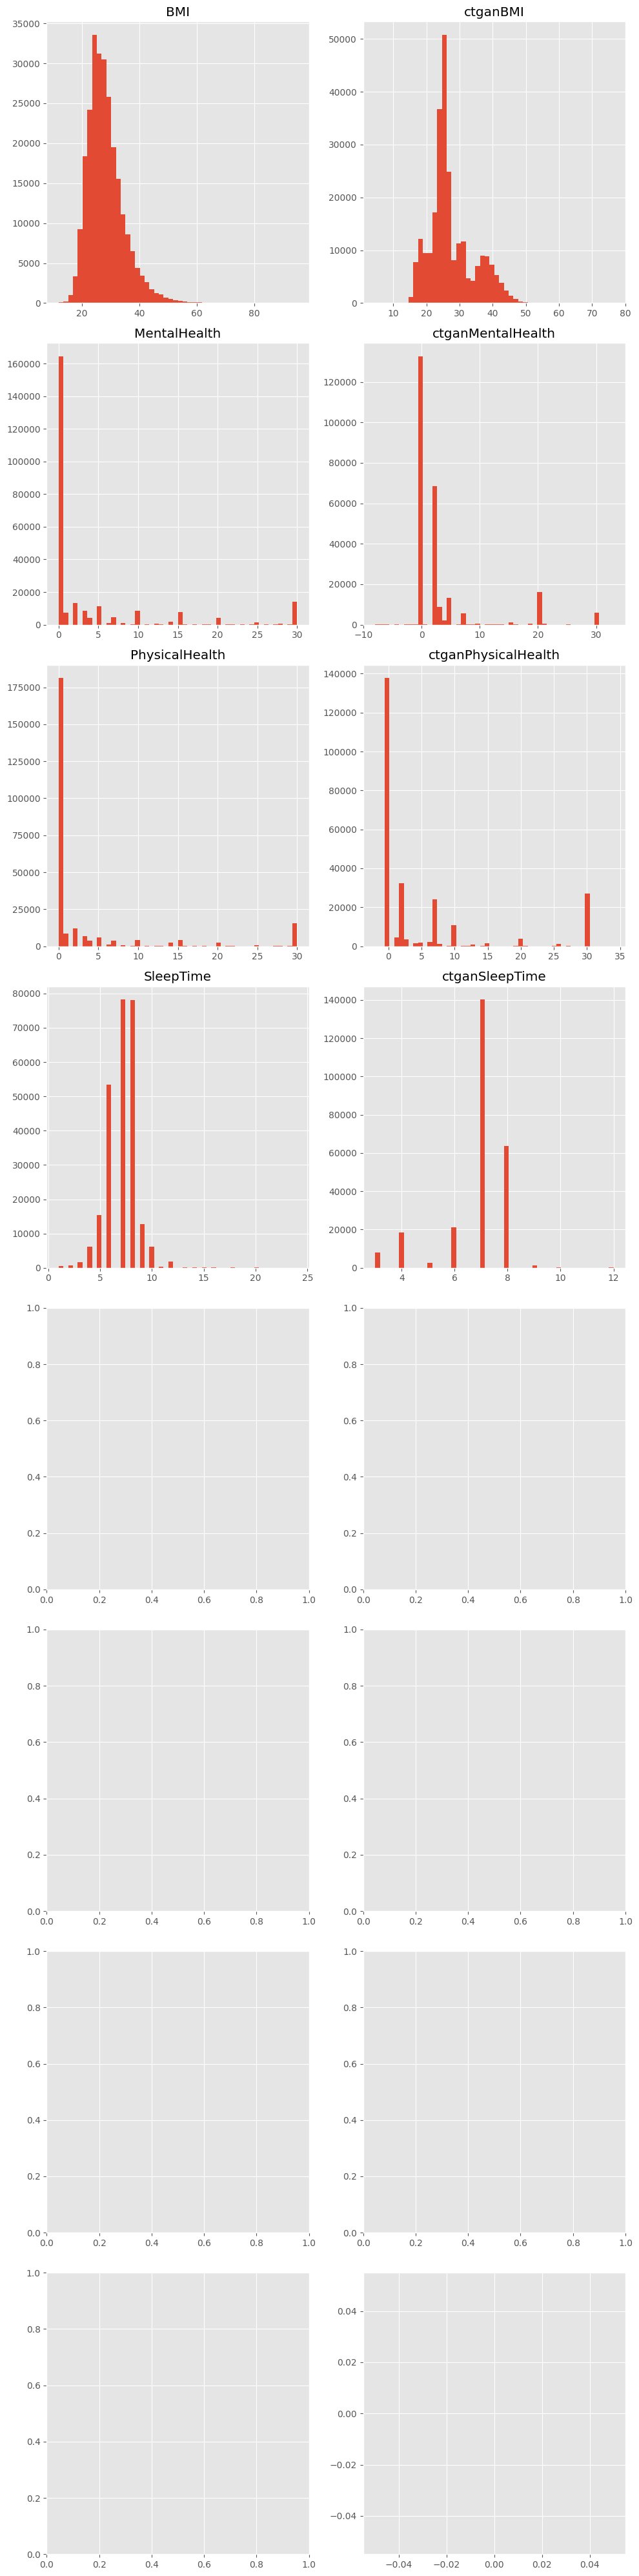

In [8]:
fig, ax = plt.subplots(figsize=(10,40), ncols=2, nrows=8)  

axes = ax.ravel()
for idx,col in zip(np.arange(0,22,2), continuous_list):      
    axes[idx].hist(real_train_df[col], bins =50)
    axes[idx].set_title(col)
    axes[idx+1].hist(fake_train_df[col], bins =50)
    axes[idx+1].set_title('ctgan'+col)
plt.tight_layout() 
plt.plot()

[]

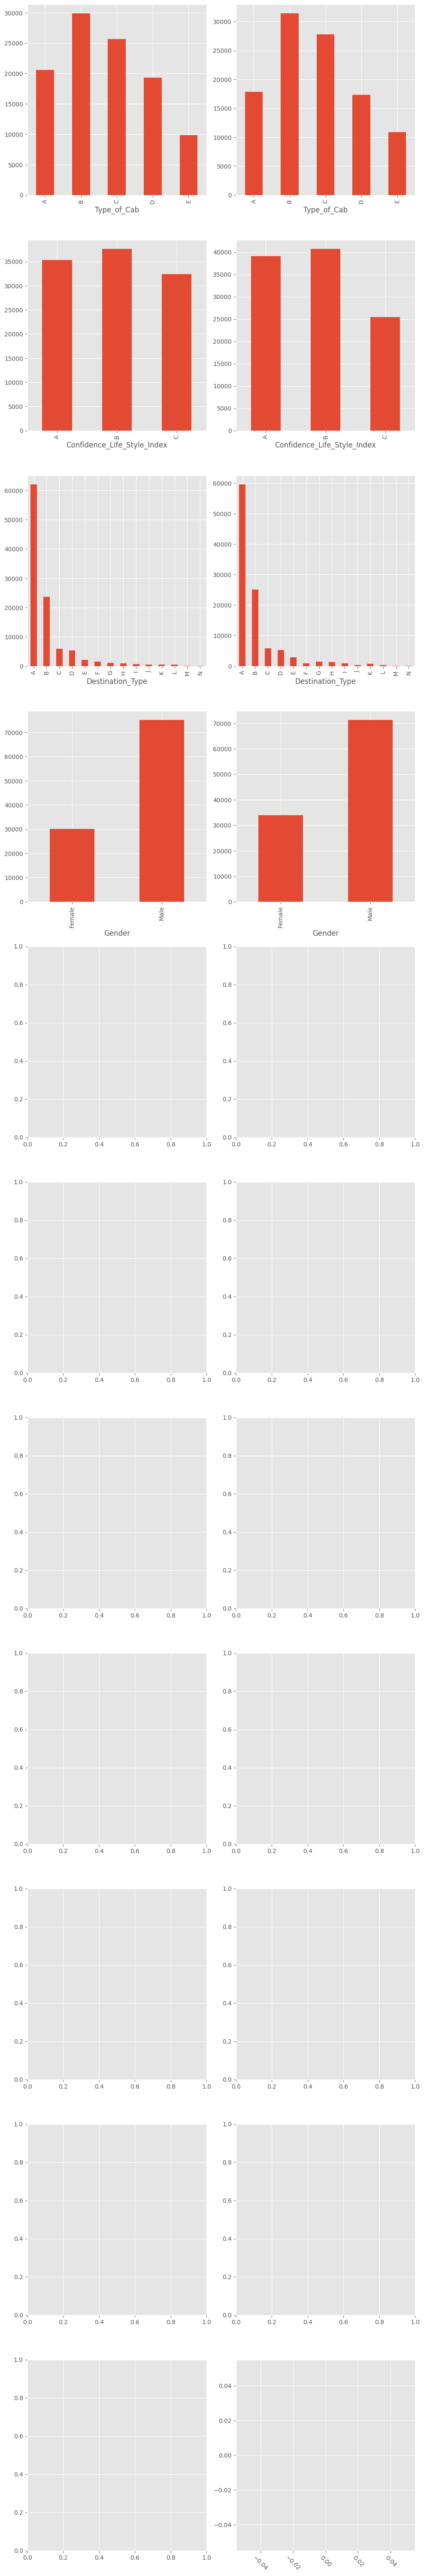

In [ ]:
## 범주형 변수 그리기
fig, axes = plt.subplots(figsize=(10,60), ncols=2, nrows=11)  

# axes = ax.ravel()
for idx,col in zip(np.arange(0,11), categorical_list):      
    real_train_df[[col]].groupby([col])[col].count().plot.bar(ax=axes[idx][0])
    fake_train_df[[col]].groupby([col])[col].count().plot.bar(ax=axes[idx][1])
plt.xticks(rotation=-45)
plt.tight_layout() 
plt.plot()

In [67]:
ctgan_cdf_df = pd.read_csv('ctgan_cdf_change_output.csv')
ctgan_cdf_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,N,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-20359,-2809,1,0,0,0,Laborers,2,-20,0
1,F,N,Y,0,157500.0,Working,Secondary / secondary special,Separated,House / apartment,-14883,-6195,1,0,1,0,Laborers,4,-5,1
2,M,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11958,-2423,1,0,0,0,Sales staff,2,-13,-1
3,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12437,-8284,1,1,1,0,NaN,2,-33,0
4,M,Y,N,0,427500.0,State servant,Secondary / secondary special,Married,House / apartment,-12005,-4542,1,0,0,0,Drivers,2,-10,-1


In [74]:
data.shape

(777715, 19)

In [75]:
ctgan_cdf_df.shape

(777715, 19)

0
2
4
6
8
10
12
14
16
18
20


[]

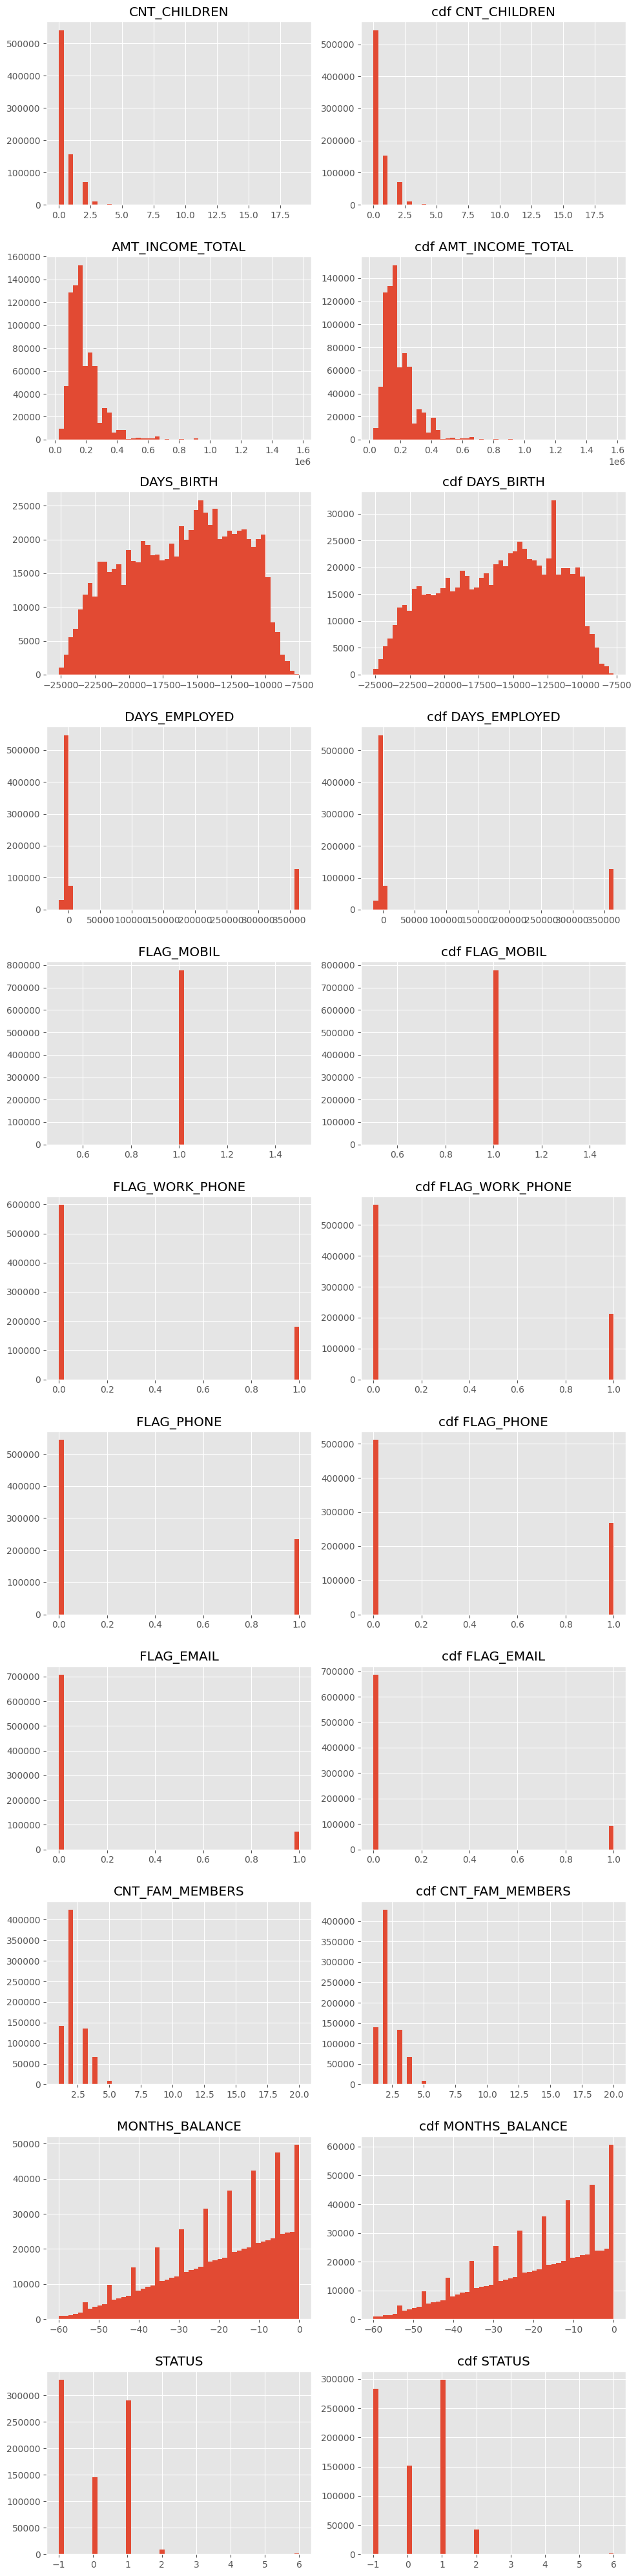

In [76]:
fig, ax = plt.subplots(figsize=(10,40), ncols=2, nrows=11)  

axes = ax.ravel()
for idx,col in zip(np.arange(0,22,2), continuous_list):      
    print(idx)
    axes[idx].hist(data[col], bins =50)
    axes[idx].set_title(col)
    axes[idx+1].hist(ctgan_cdf_df[col], bins =50)
    axes[idx+1].set_title('cdf '+col)
plt.tight_layout() 
plt.plot()